This notebook will:
- Extract CSV Data: Obtain a CSV file of the respective holders using M1 Finance's built-in CSV export feature.
- Calculate Metrics: Add Beta and Standard Deviation to the data for the respective time frequencies.
- Export Portfolio Stats: Save the final portfolio statistics to a file upon completion.
- Plot Analysis: Visualize total risk and return over a specified time frame.
- Note: 
    - This notebook assumes you are using macOS 
    - That the file is downloaded to the Desktop, and relfects todays date

Libraries

In [117]:
from datetime import datetime, timedelta, date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import zscore

import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.stock_utils import StockAnalysis, StockRatios, analyze_stocks
from utils.plotting_utils import risk_return_plot

Global Varibales

In [118]:
# Put user name here
user = 'blakeuribe'
sns.set_style('darkgrid')
plt.style.use('dark_background')

Time Variables

In [119]:
historical_years = 5
time_freq = '1d'

# Change start date accordingly 
todays_date = date.today()
start_date = datetime.now() - timedelta(days=historical_years*365)

Import Paths

In [120]:
# Asjust file path
formatted_date = todays_date.strftime('%b-%d-%Y')
file_path = f'/Users/{user}/Desktop/Holdings-{formatted_date}.csv'

try:
    raw_portfolio_df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError('Enter User, or select updated CSV file from M1 Finance.')

Export Paths

In [121]:
export_path = f'data/portfolio_info_{todays_date}.csv'
figures_path = f'/Users/{user}/Desktop/opt_portfolio/figures'

Analysis

In [122]:
symbols = raw_portfolio_df['Symbol'].values
combined_summary_df = analyze_stocks(symbols, start_date, todays_date, time_freq)
portfolio_df = pd.merge(raw_portfolio_df, combined_summary_df, on='Symbol', how='outer')
portfolio_df
portfolio_df = portfolio_df.copy().round(2)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [123]:
portfolio_df

,Symbol,Name,Quantity,Avg. Price,Cost Basis,Unrealized Gain ($),Unrealized Gain (%),Value,Sector,Average_Return(%),Beta,Standard_Deviation(%),Total_Risk
0,COST,Costco Wholesale Corp.,0.77,529.48,407.5,250.48,61.47,657.98,Consumer Defensive,0.11,0.73,1.52,2.25
1,HDV,iShares Core High Dividend ETF,53.55,97.62,"5,227.94",864.77,16.54,"6,092.71",Large Value,0.04,0.78,1.21,1.99
2,MSFT,Microsoft,1.60,382.22,612.26,38.12,6.23,650.38,Technology,0.11,1.19,1.91,3.10
3,SOXX,iShares PHLX Semiconductor ETF,5.22,175.96,919.41,187.13,20.35,"1,106.54",Technology,0.12,1.46,2.29,3.75
4,TMF,Direxion Daily 20+ Year Treasury Bull 3X Shares,14.89,51.31,764.01,64.33,8.42,828.34,Trading--Leveraged Debt,-0.08,-0.39,3.34,2.95
5,VDC,Vanguard Consumer Staples ETF,19.13,187.85,"3,593",406.57,11.32,"3,999.57",Consumer Defensive,0.04,0.64,1.07,1.71
6,VOO,Vanguard S&P 500 ETF,17.94,413.51,"7,419.13","1,369.11",18.45,"8,788.24",Large Blend,0.07,1.01,1.34,2.35
7,WM,"Waste Management, Inc.",1.89,164.30,310.72,77.45,24.93,388.17,Industrials,0.06,0.64,1.41,2.05
8,XLE,Energy Select Sector SPDR Fund,21.70,82.26,"1,785.22",155.14,8.69,"1,940.36",Equity Energy,0.08,1.06,2.29,3.35
9,XLK,Technology Select Sector SPDR Fund,12.83,188.46,"2,418.19",220.31,9.11,"2,638.5",Technology,0.10,1.23,1.74,2.97


Graphs

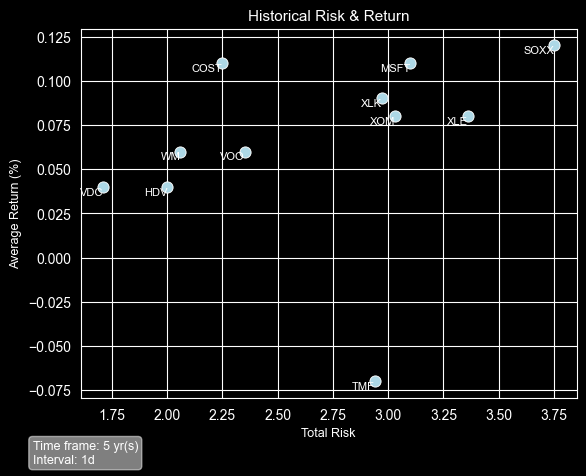

<Figure size 640x480 with 0 Axes>

In [7]:
# plot = risk_return_plot(portfolio_df, 'Total_Risk', 'Average_Return(%)', historical_years=historical_years, time_freq=time_freq)
# plt.savefig(f'{figures_path}/risk_return.png')

File Export

In [8]:
portfolio_df.to_csv(f'/Users/{user}/Desktop/opt_portfolio/data/portfolio_stats_{formatted_date}.csv')

In [9]:
portfolio_df

,Symbol,Name,Quantity,Avg. Price,Cost Basis,Unrealized Gain ($),Unrealized Gain (%),Value,Sector,Average_Return(%),Beta,Standard_Deviation(%),Total_Risk
0,COST,Costco Wholesale Corp.,0.77,529.48,407.5,250.48,61.47,657.98,Consumer Defensive,0.11,0.73,1.52,2.25
1,HDV,iShares Core High Dividend ETF,53.55,97.62,"5,227.94",864.77,16.54,"6,092.71",Large Value,0.04,0.78,1.22,2.00
2,MSFT,Microsoft,1.60,382.22,612.26,38.12,6.23,650.38,Technology,0.11,1.19,1.91,3.10
3,SOXX,iShares PHLX Semiconductor ETF,5.22,175.96,919.41,187.13,20.35,"1,106.54",Technology,0.12,1.46,2.29,3.75
4,TMF,Direxion Daily 20+ Year Treasury Bull 3X Shares,14.89,51.31,764.01,64.33,8.42,828.34,Trading--Leveraged Debt,-0.07,-0.40,3.34,2.94
5,VDC,Vanguard Consumer Staples ETF,19.13,187.85,"3,593",406.57,11.32,"3,999.57",Consumer Defensive,0.04,0.64,1.07,1.71
6,VOO,Vanguard S&P 500 ETF,17.94,413.51,"7,419.13","1,369.11",18.45,"8,788.24",Large Blend,0.06,1.01,1.34,2.35
7,WM,"Waste Management, Inc.",1.89,164.30,310.72,77.45,24.93,388.17,Industrials,0.06,0.64,1.42,2.06
8,XLE,Energy Select Sector SPDR Fund,21.70,82.26,"1,785.22",155.14,8.69,"1,940.36",Equity Energy,0.08,1.06,2.30,3.36
9,XLK,Technology Select Sector SPDR Fund,12.83,188.46,"2,418.19",220.31,9.11,"2,638.5",Technology,0.09,1.23,1.74,2.97


Financial Ratios

In [85]:
portfolio_ratio_df = StockRatios(portfolio_df['Symbol']).get_ratio_df()
portfolio_df = pd.merge(portfolio_df, portfolio_ratio_df, on='Symbol', how='left')
portfolio_df
# portfolio_ratio_df

,Symbol,Name,Quantity,Avg. Price,Cost Basis,Unrealized Gain ($),Unrealized Gain (%),Value,Sector,Average_Return(%),Beta,Standard_Deviation(%),Total_Risk,Gross_Profit_Margin
0,COST,Costco Wholesale Corp.,0.77,529.48,407.5,250.48,61.47,657.98,Consumer Defensive,0.11,0.73,1.52,2.25,12.547210
1,HDV,iShares Core High Dividend ETF,53.55,97.62,"5,227.94",864.77,16.54,"6,092.71",Large Value,0.04,0.78,1.22,2.00,NaN
2,MSFT,Microsoft,1.60,382.22,612.26,38.12,6.23,650.38,Technology,0.11,1.19,1.91,3.10,69.589198
3,SOXX,iShares PHLX Semiconductor ETF,5.22,175.96,919.41,187.13,20.35,"1,106.54",Technology,0.12,1.46,2.29,3.75,NaN
4,TMF,Direxion Daily 20+ Year Treasury Bull 3X Shares,14.89,51.31,764.01,64.33,8.42,828.34,Trading--Leveraged Debt,-0.07,-0.40,3.34,2.94,NaN
5,VDC,Vanguard Consumer Staples ETF,19.13,187.85,"3,593",406.57,11.32,"3,999.57",Consumer Defensive,0.04,0.64,1.07,1.71,NaN
6,VOO,Vanguard S&P 500 ETF,17.94,413.51,"7,419.13","1,369.11",18.45,"8,788.24",Large Blend,0.06,1.01,1.34,2.35,NaN
7,WM,"Waste Management, Inc.",1.89,164.30,310.72,77.45,24.93,388.17,Industrials,0.06,0.64,1.42,2.06,39.078119
8,XLE,Energy Select Sector SPDR Fund,21.70,82.26,"1,785.22",155.14,8.69,"1,940.36",Equity Energy,0.08,1.06,2.30,3.36,NaN
9,XLK,Technology Select Sector SPDR Fund,12.83,188.46,"2,418.19",220.31,9.11,"2,638.5",Technology,0.09,1.23,1.74,2.97,NaN


In [88]:
portfolio_ratio_df

,Symbol,Gross_Profit_Margin
Date,,
2024-05-31,COST,12.547210
2024-06-30,MSFT,69.589198
2024-06-30,WM,39.078119
2024-06-30,XOM,22.443491


In [72]:
def get_z_score(x: float, mu: float, std: float) -> float:
    return (x - mu) / std


In [59]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url, header=0)
sp500_df = table[0]

drop_cols = [
    'Headquarters Location',
    'Date added', 
    'CIK',
    'Founded'
]
sp500_df = sp500_df.drop(columns=drop_cols)

spy_ratio = StockRatios(sp500_df['Symbol']).get_ratio_df()
spy_ratio = pd.merge(sp500_df, spy_ratio, on='Symbol')

In [110]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url, header=0)
sp500_df = table[0]

drop_cols = [
    'Headquarters Location',
    'Date added', 
    'CIK',
    'Founded'
]
sp500_df = sp500_df.drop(columns=drop_cols)

spy_ratio = StockRatios(sp500_df['Symbol']).get_ratio_df()
spy_ratio = pd.merge(sp500_df, spy_ratio, on='Symbol')
sector_kpi = spy_ratio.groupby('GICS Sector')['Gross_Profit_Margin'].agg(['mean', 'std']).reset_index()
sector_kpi.rename(columns={'mean': 'Sector_Avg_GPM', 'std': 'GPM_Std'}, inplace=True)

# Map and rename sector names
value_mapping = {
    'Information Technology': 'Technology',
    'Health Care': 'Healthcare',
    'Consumer Staples': 'Consumer Defensive'
}
sector_kpi['GICS Sector'] = sector_kpi['GICS Sector'].replace(value_mapping)
sector_kpi.rename(columns={'GICS Sector': 'Sector'}, inplace=True)

# Prepare portfolio DataFrame
stock_vs_sector_kpi = portfolio_df[['Symbol', 'Sector', 'Gross_Profit_Margin']].dropna()
stock_vs_sector_kpi.rename(columns={'Gross_Profit_Margin': 'Stock_GPM'}, inplace=True)

# Merge DataFrames
stock_vs_sector_kpi = pd.merge(stock_vs_sector_kpi, sector_kpi, on='Sector', how='right').dropna()


# # Apply Z-score calculation
stock_vs_sector_kpi['GPM_Z_score'] = stock_vs_sector_kpi.apply(lambda row: get_z_score(row['Stock_GPM'], row['Sector_Avg_GPM'], row['GPM_Std']), axis=1)
stock_vs_sector_kpi['GPM_Pct_Diff(%)'] = (stock_vs_sector_kpi['Stock_GPM'] - stock_vs_sector_kpi['Sector_Avg_GPM'])/ stock_vs_sector_kpi['Sector_Avg_GPM']

In [111]:
stock_vs_sector_kpi

,Symbol,Sector,Stock_GPM,Sector_Avg_GPM,GPM_Std,GPM_Z_score,GPM_Pct_Diff(%)
2,COST,Consumer Defensive,12.547210,37.508713,17.994538,-1.387171,-0.665485
3,XOM,Energy,22.443491,35.415173,19.489770,-0.665564,-0.366275
6,WM,Industrials,39.078119,36.188500,15.089815,0.191495,0.079849
7,MSFT,Technology,69.589198,56.396200,19.526552,0.675644,0.233934


In [90]:
comparasion = 'spy'

url_dict = {
    'spy': 'spy_url',
    'qqq': 'qqq_url'
}

url = url_dict[comparasion]
url

'spy_url'

In [91]:
sp500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services
...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment


In [105]:
def get_z_score(x: float, mu: float, std: float) -> float:
    """Calculate the Z-score."""
    return (x - mu) / std

Class will work, but need to figure out how to do z score for mulitple kpi

In [145]:

class SP500Analyzer:
    
    def __init__(self, symbols_sector: pd.DataFrame, comparasion: str = 'spy'):
        self.symbols_sector = symbols_sector
        
        self.url_dict = {
            'spy': 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies',
            }
        self.url = self.url_dict[comparasion]
        
        self.sp500_ratio = self._get_spy_ratios()
        self.kpi_by_sector = self._calculate_sector_kpi()
        self.stock_vs_sector_kpi = self._prepare_sector_stock_kpi()
        # self.stock_vs_sector_kpi = self._prepare_stock_vs_sector_kpi()

    def _get_spy_ratios(self) -> pd.DataFrame:
        sp500_df = pd.read_html(self.url, header=0)[0]

        drop_cols = [
            'Headquarters Location',
            'Date added', 
            'CIK',
            'Founded',
            'Security',
            'GICS Sub-Industry'
            ]
        sp500_df = sp500_df.drop(columns=drop_cols)
        sp500_ratio = StockRatios(sp500_df['Symbol']).get_ratio_df()
        sp500_ratio = pd.merge(sp500_df, sp500_ratio, on='Symbol')
        return sp500_ratio
    
    def _calculate_sector_kpi(self) -> pd.DataFrame:
        """Calculate sector KPIs."""
        nominal_cols = ['Symbol', 'GICS Sector']
        calc_cols = [col for col in self.sp500_ratio.columns if col not in nominal_cols]
        for col in calc_cols:
            kpi_by_sector = self.sp500_ratio.groupby('GICS Sector')[col].agg(['mean', 'std']).reset_index()
            kpi_by_sector.rename(columns={'mean': f'Avg_{col}', 'std': f'Std_{col}'}, inplace=True)
        
        # Map and rename sector names
        value_mapping = {
            'Information Technology': 'Technology',
            'Health Care': 'Healthcare',
            'Consumer Staples': 'Consumer Defensive'
        }
        kpi_by_sector['GICS Sector'] = kpi_by_sector['GICS Sector'].replace(value_mapping)
        kpi_by_sector.rename(columns={'GICS Sector': 'Sector'}, inplace=True)
        return kpi_by_sector
# good

    def _prepare_sector_stock_kpi(self) -> pd.DataFrame:
        """Prepare and merge stock vs sector KPI data."""
        stock_kpi = StockRatios(self.symbols_sector['Symbol']).get_ratio_df()
        stock_sector_df = pd.merge(self.symbols_sector, stock_kpi, on='Symbol', how='right').dropna()
        stock_vs_sector_kpi = pd.merge(stock_sector_df, self.kpi_by_sector, on='Sector', how='right').dropna()
        # 
        
        # Need to add for loop to do for all ratios
        # Apply Z-score calculation
        
        # nominal_cols = ['Symbol', 'Sector']
        # calc_cols = [col for col in self.stock_vs_sector_kpi.columns if col not in nominal_cols]
        # for col in calc_cols
        stock_vs_sector_kpi['GPM_Z_score'] = stock_vs_sector_kpi.apply(
            lambda row: get_z_score(row['Gross_Profit_Margin'], row['Avg_Gross_Profit_Margin'], row['Std_Gross_Profit_Margin']), axis=1
        )
        stock_vs_sector_kpi['GPM_Pct_Diff(%)'] = (stock_vs_sector_kpi['Gross_Profit_Margin'] - stock_vs_sector_kpi['Avg_Gross_Profit_Margin']) / stock_vs_sector_kpi['Avg_Gross_Profit_Margin'] * 100
        
        return stock_vs_sector_kpi

    def _get_results(self) -> pd.DataFrame:
        """Return the final DataFrame with KPIs."""
        return self.stock_vs_sector_kpi

In [146]:
test = SP500Analyzer(portfolio_df[['Symbol', 'Sector']])

In [149]:
test = test._get_results()

work on making z score calc more applicable and naming convention

In [155]:
nominal_cols = ['Symbol', 'Sector']
calc_cols = [col for col in test.columns if col not in nominal_cols]
calc_cols
for col in calc_cols:
    gen_name = col.split('_', 1)[-1]
    print(gen_name)
    print(f'{gen_name}_Z_score')
    print('------')
    # stock_vs_sector_kpi[f'{gen_name}_Z_score'] = stock_vs_sector_kpi.apply(
    # lambda row: get_z_score(row['Gross_Profit_Margin'], row['Avg_Gross_Profit_Margin'], row['Std_Gross_Profit_Margin']), axis=1
    # )
    # stock_vs_sector_kpi[f'{gen_name}_Pct_Diff(%)'] = (stock_vs_sector_kpi['Gross_Profit_Margin'] - stock_vs_sector_kpi['Avg_Gross_Profit_Margin']) / stock_vs_sector_kpi['Avg_Gross_Profit_Margin'] * 100
            

Profit_Margin
Profit_Margin_Z_score
------
Gross_Profit_Margin
Gross_Profit_Margin_Z_score
------
Gross_Profit_Margin
Gross_Profit_Margin_Z_score
------
Z_score
Z_score_Z_score
------
Pct_Diff(%)
Pct_Diff(%)_Z_score
------


In [113]:
portfolio_ratio_df

,Symbol,Gross_Profit_Margin
Date,,
2024-05-31,COST,12.547210
2024-06-30,MSFT,69.589198
2024-06-30,WM,39.078119
2024-06-30,XOM,22.443491


In [87]:
stock_vs_sector_kpi.round(2)

,Symbol,Sector,Stock_GPM,Sector_Avg_GPM,GPM_Std,GPM_Z_score,GPM_Pct_Diff(%)
2,COST,Consumer Defensive,12.55,37.51,17.99,-1.39,-0.67
3,XOM,Energy,22.44,35.42,19.49,-0.67,-0.37
6,WM,Industrials,39.08,36.19,15.09,0.19,0.08
7,MSFT,Technology,69.59,56.40,19.53,0.68,0.23


([<matplotlib.axis.XTick at 0x11a2492d0>,
 [Text(0, 0, 'COST'), Text(1, 0, 'XOM'), Text(2, 0, 'WM'), Text(3, 0, 'MSFT')])

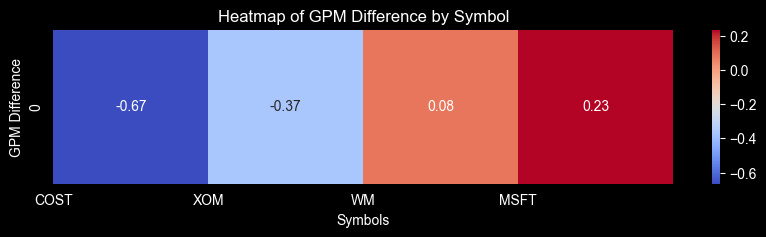

In [70]:
heatmap_data = df.set_index('Symbol')['GPM_Pct_Diff'].T  # Transpose for heatmap format

# Create the heatmap
plt.figure(figsize=(10, 2))  # Adjust size as needed
ax = sns.heatmap([heatmap_data], annot=True, cmap='coolwarm')
# vmin=df['GPM_Z_score'].max(), vmax=df['GPM_Z_score'].min(), fmt='0.2f', cbar_kws={'label': 'GPM_Z_score'})

# Set titles and labels
plt.title('Heatmap of GPM Difference by Symbol')
plt.xlabel('Symbols')
plt.ylabel('GPM Difference')

# Adjust x-axis to show symbols properly
plt.xticks(ticks=range(len(df['Symbol'])), labels=df['Symbol'])
